# <u> Heart Failure -  Analysis</u>



![Heart Failure Image](https://st4.depositphotos.com/1005233/23486/i/600/depositphotos_234866006-stock-photo-view-businessman-holding-rendering-medical.jpg)

# Introduction 

## About - Dataset:
   <p style='text-align:justify;'> Cardiovascular diseases kill approximately 17 million people globally every year and they mainly exhibit as myocardial infarctions and heart failures. Heart failure (HF) occurs when the heart cannot pump enough blood to meet the needs of the body.
        In this project, we analyze a dataset containing the medical records of 299 heart failure patients collected at the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad (Punjab - Pakistan) during the months of April - December in 2015. It consists of 105 women and 194 men with their ages range between 40 and 95 years old. All 299 patients had left ventricular systolic dysfunction and had previous heart failures. This dataset contains 13 features, which reports clinical, body and lifestyle information of a patient namely Age, Anaemia, High Blood Pressure, Creatinine Phosphokinase (CPK), Diabetes, Ejection Fraction, Sex, Platelets, Serum Creatinine, Serum Sodium, Smoking Habit etc.</p>
       
## About - Project:
   <p style='text-align:justify;'>This Exploratory Data Analysis project is a part of "Data Analysis with Python: Zero to Pandas" course structured and provided by Jovian. In this project, we'll analyse the relationship between the different features of the heart failure patient included in this dataset namely the distribution of age among the patients, death rate, percentage of male and female patients, variation in the platelets amount, creatinine and sodium level in the blood. The graphical representation and visualisation of data using matplotlib and seaborn library in python helps us to easily understand a lot better about the dataset.</p>

## Dataset - Source:
The dataset is obtained from [Kaggle](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data).

Please [click here](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5) to know more about the dataset.
<p style='text-align:justify;'> The dataset consist of column names (attributes) which doesn't provide complete information regarding the data recorded, so we have to refer to the another table / websites to see the complete information regarding the attributes (column names) including measurement units and normal level, if required.</p>

<p style='text-align:justify;'> Please click the below link to view the table containing information regarding column names.</p>

[Attributes Information Table](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1) 


## Download the Dataset:
   <p style='text-align:justify;'>There are several options for getting the dataset into Jupyter:</p>
   
*  <p style='text-align:justify;'> Download the CSV manually and upload it via Jupyter's GUI</p>
    
*  <p style='text-align:justify;'> Use the urlretrieve function from the urllib.request to download CSV files from a raw URL</p>
    
*  <p style='text-align:justify;'> Use a helper library, e.g., opendatasets, which contains a collection of curated datasets and provides a helper function for direct download.</p>

<p style='text-align:justify;'>Initially, I used the opendatasets helper library to download the files from Kaggle using my username and API key. Later, I uploaded the same dataset to my Github profile, to fetch the dataset directly with just few lines of code (using urllib.request.urlretrieve function) without any username or API key, just for my convenience.</p>

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:

dataset_url = 'https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data' 

In [3]:
#import urlretrieve function to download the dataset 
from urllib.request import urlretrieve 
urlretrieve(dataset_url, 'heart_failure_dataset.csv')

('heart_failure_dataset.csv', <http.client.HTTPMessage at 0x7f84e08283d0>)

The dataset has been downloaded and extracted.

In [4]:
import os

In [5]:

os.listdir()

['.git',
 '.jovianrc',
 'zerotopandas-course-project.ipynb',
 '.ipynb_checkpoints',
 'heart_failure_dataset.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "zerotopandas-course-project-starter" 

## Data Preparation and Cleaning

  <p style='text-align:justify;'> Let's load the CSV files using the Pandas library. We'll use the name "heart_failure_raw_df" for the data frame to indicate this is unprocessed data that we might clean, filter and modify to prepare a data frame ready for analysis. So we have to extract a copy of data frame and name it as "heart_failure_df". We'll perform data preparation and cleaning operations on "heart_failure_df"  and leave the raw data frame untouched and unmodified. </p>



In [21]:
import pandas as pd
import numpy as np

In [17]:
#convert the csv file into pandas data frame 
heart_failure_raw_df = pd.read_csv('heart_failure_clinical_records_dataset.csv',on_bad_lines='skip')


In [19]:
heart_failure_raw_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [20]:
#let's extract a copy of raw df to keep the raw df unaffected / untouched 
heart_failure_df = heart_failure_raw_df.copy()
heart_failure_df 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


  <p style='text-align:justify;'> Let's modify our "heart_failure_df" data frame by dropping unnecessary columns / rows, renaming the column names, changing the data type of column and so on.</p>

In [22]:
#renaming DEATH_EVENT as patient_dead for my convenience 
heart_failure_df.rename(columns = {'DEATH_EVENT':'patient_dead'}, inplace = True)
#drop the time column which is not necessary for our analysis 
heart_failure_df.drop(['time'],axis=1, inplace =True, errors = 'ignore')
#changing the data type of age column from float to int
heart_failure_df.age = heart_failure_df.age.astype(int)
#changing the data type of following columns to bool type for our convenience 
heart_failure_df[['anaemia','diabetes','high_blood_pressure', 'smoking', 'patient_dead']] = heart_failure_df[['anaemia','diabetes', 'high_blood_pressure', 'smoking', 'patient_dead']].astype(bool)
#changing the value of sex column to male or female
heart_failure_df['sex'] = np.where(heart_failure_df['sex'] == 1, 'Male','Female')
#to convert the platelet-count into kilo-platelets/mcL 
heart_failure_df.platelets = (heart_failure_df. platelets/1000).astype(int)
heart_failure_df 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
0,75,False,582,False,20,True,265,1.9,130,Male,False,True
1,55,False,7861,False,38,False,263,1.1,136,Male,False,True
2,65,False,146,False,20,False,162,1.3,129,Male,True,True
3,50,True,111,False,20,False,210,1.9,137,Male,False,True
4,65,True,160,True,20,False,327,2.7,116,Female,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,False,61,True,38,True,155,1.1,143,Male,True,False
295,55,False,1820,False,38,False,270,1.2,139,Female,False,False
296,45,False,2060,True,60,False,742,0.8,138,Female,False,False
297,45,False,2413,False,38,False,140,1.4,140,Male,True,False


**Check for null values in data frame**

  <p style='text-align:justify;'> isna().any() function returns 'True', if there's any null (Nan) value in data frame and returns False if there's no null value.</p>

In [23]:
heart_failure_df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
patient_dead                False
dtype: bool

In [25]:
heart_failure_df.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.829431,581.839465,38.083612,263.327759,1.39388,136.625418
std,11.894997,970.287881,11.834841,97.805105,1.03451,4.412477
min,40.000000,23.000000,14.000000,25.000000,0.50000,113.000000
25%,51.000000,116.500000,30.000000,212.500000,0.90000,134.000000
50%,60.000000,250.000000,38.000000,262.000000,1.10000,137.000000
75%,70.000000,582.000000,45.000000,303.500000,1.40000,140.000000
max,95.000000,7861.000000,80.000000,850.000000,9.40000,148.000000


In [27]:
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    bool   
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    bool   
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    bool   
 6   platelets                 299 non-null    int64  
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    bool   
 11  patient_dead              299 non-null    bool   
dtypes: bool(5), float64(1), int64(5), object(1)
memory usage: 17.9+ KB


In [28]:
heart_failure_df[heart_failure_df.creatinine_phosphokinase >1000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1 to 297
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       36 non-null     int64  
 1   anaemia                   36 non-null     bool   
 2   creatinine_phosphokinase  36 non-null     int64  
 3   diabetes                  36 non-null     bool   
 4   ejection_fraction         36 non-null     int64  
 5   high_blood_pressure       36 non-null     bool   
 6   platelets                 36 non-null     int64  
 7   serum_creatinine          36 non-null     float64
 8   serum_sodium              36 non-null     int64  
 9   sex                       36 non-null     object 
 10  smoking                   36 non-null     bool   
 11  patient_dead              36 non-null     bool   
dtypes: bool(5), float64(1), int64(5), object(1)
memory usage: 2.4+ KB


  <p style='text-align:justify;'> The normal value of CPK ranges from 10 to 120 micrograms per liter, but around 36 patients has CPK level more than 1000 micrograms per liter in our observation. Since, we are not sure about the source of error or that the recorded data is correct or not. This error and huge difference in value might be due to the different measurement units. So let's drop that column and not include in our analysis.</p>

In [29]:
#to drop creatinine_phosphokinase column
heart_failure_df.drop('creatinine_phosphokinase', inplace = True, axis = 1, errors ='ignore')

In [30]:
#to display column names
heart_failure_df.columns

Index(['age', 'anaemia', 'diabetes', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
       'sex', 'smoking', 'patient_dead'],
      dtype='object')

  <p style='text-align:justify;'> There are 11 column in our data frame, where each column represents the attribute of the 299 heart failure patients.</p>
  <p style='text-align:justify;'> 
column names (attributes) of the data frame doesn't provide complete information regarding the data recorded, so we have to refer to the another table or any website for reference to see the complete information regarding the attributes (column names) like explanation and measurement units. Also we have to add normal level value for the attributes, for the required column values.</p>
  <p style='text-align:justify;'> 
Pandas library in python provides various useful functions to read various file formats, here we'll use read_html function to read a table from the source website. Kindly check the reference links at the bottom of this page.</p>

In [32]:
heart_failure_df.shape

(299, 11)

## Number of Male and Females

In [33]:
heart_failure_df.sex.value_counts()

Male      194
Female    105
Name: sex, dtype: int64

## Number of ptients with Anamia

In [34]:
heart_failure_df.anaemia.value_counts()

False    170
True     129
Name: anaemia, dtype: int64

## Number of Patients with Diabetes

In [35]:
heart_failure_df.diabetes.value_counts()

False    174
True     125
Name: diabetes, dtype: int64

## Number of Patients with High Blood Pressure

In [36]:
heart_failure_df.high_blood_pressure.value_counts()

False    194
True     105
Name: high_blood_pressure, dtype: int64

## Number of Patients with smoking habits

In [37]:
heart_failure_df.smoking.value_counts()

False    203
True      96
Name: smoking, dtype: int64

In [41]:
abn_ef = heart_failure_df[(heart_failure_df.ejection_fraction < 55) | (heart_failure_df.ejection_fraction >70)]
abn_ef

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
0,75,False,False,20,True,265,1.9,130,Male,False,True
1,55,False,False,38,False,263,1.1,136,Male,False,True
2,65,False,False,20,False,162,1.3,129,Male,True,True
3,50,True,False,20,False,210,1.9,137,Male,False,True
4,65,True,True,20,False,327,2.7,116,Female,False,True
...,...,...,...,...,...,...,...,...,...,...,...
293,63,True,True,35,False,179,0.9,136,Male,True,False
294,62,False,True,38,True,155,1.1,143,Male,True,False
295,55,False,False,38,False,270,1.2,139,Female,False,False
297,45,False,False,38,False,140,1.4,140,Male,True,False


## Sample Data
<p style='text-align:justify;'> 
We've now cleaned up and prepared the dataset for our analysis. Let's take a look at a sample of rows from the data frame.</p>

In [44]:
heart_failure_df.sample(5)

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
202,70,False,False,60,True,220,0.9,138,Male,False,False
216,70,False,False,50,True,358,0.9,141,Female,False,False
77,42,False,True,40,False,237,1.2,140,Male,False,False
3,50,True,False,20,False,210,1.9,137,Male,False,True
188,60,True,True,40,True,201,1.0,136,Female,False,False


## Exploratory Analysis & Visualization

  <p style='text-align:justify;'> Data visualization is the representation of data through use of common graphics, such as charts, plots, infographics, and even animations. These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand.</p>
  <p style='text-align:justify;'> 
Let's install and import "seaborn" library as "sns" and "matplotlib.pyplot" module as "plt" to perform some visualization operations on our data frame to understand the distribution and relationships of attributes.</p>



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [47]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

 ## Age
 
 <p style='text-align:justify;'> Let's have a look at the distribution of age of the heart failure patients recorded in our dataset by using "hist" function from "matplotlib.pyplot" which is used to create histograms.</p>

  <p style='text-align:justify;'><b> "A histogram represents the distribution of a variable by creating bins (interval) along the range of values and showing vertical bars to indicate the number of observations in each bin".</b></p>



Text(0.5, 1.0, 'Distribution of Age')

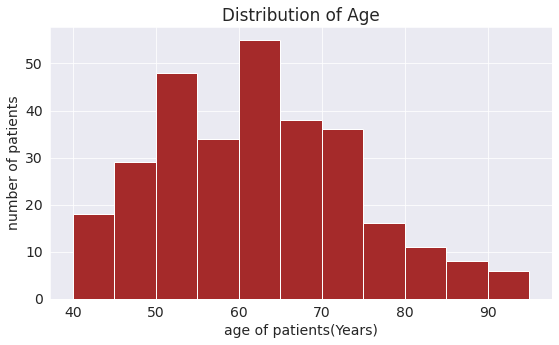

In [48]:
plt.hist(heart_failure_df.age,bins=np.arange(40,100,5),color='brown')
plt.xlabel("age of patients(Years)")
plt.ylabel("number of patients")
plt.title("Distribution of Age")

  <p style='text-align:justify;'> From the above histogram, it's clear that most of the patients falls under 60-65 age group and the next place goes to 50-55 age group.</p>
  <p style='text-align:justify;'> 
The life expectancy of a person in Pakistan in 2015 was approximately 67 years. It's obvious that the number of patients recorded starts declining from 65-70 age group. You can see the complete list of life expectancy of people in Pakistan (1950 - 2021) using the link given in the reference section.</p>


### Gender

  <p style='text-align:justify;'> The distribution of gender of the Heart Failure patients is another crucial factor to look at. Let's visualize the gender distribution using pie chart. </p>

In [55]:
#to store the gender counts into a variable
gender_counts= heart_failure_df.sex.value_counts()
gender_counts

Male      194
Female    105
Name: sex, dtype: int64

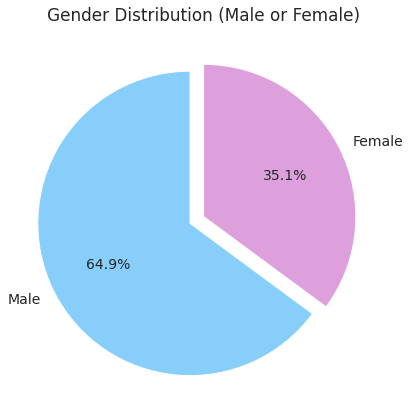

In [51]:
plt.figure(figsize=(14, 7))
plt.pie(gender_counts, labels = gender_counts.index, autopct ='%.1f%%', startangle = 90, explode = [0.1, 0], colors = ['lightskyblue', 'plum'])
plt.title("Gender Distribution (Male or Female)");

  <p style='text-align:justify;'> As we can clearly see, only 35.1% of the heart failure patients were female in our observation. This means that we have more number of male patients when compared to females in the dataset. So, we can easily say that this dataset is slightly imbalanced. </p>

### Death

  <p style='text-align:justify;'> Let's check the relationship between death of the patients and their age group and gender. </p>

In [54]:
#count number of patients dead
dead_counts=heart_failure_df.patient_dead.value_counts()
dead_counts

False    203
True      96
Name: patient_dead, dtype: int64

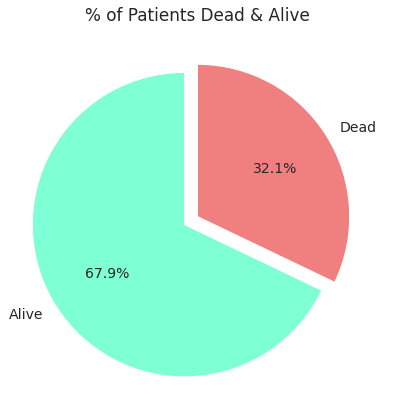

In [57]:
plt.figure(figsize=(14,7))
plt.pie(dead_counts, labels = ['Alive', 'Dead'] , autopct ='%.1f%%', startangle = 90, explode=[0.1, 0], colors =['aquamarine', 'lightcoral'])
plt.title("% of Patients Dead & Alive");

  <p style='text-align:justify;'> As we can clearly see that, the percentage of patients died during the follow-up period is 32.1%. This might be because the data mentioned in our data frame corresponds to only the certain period of time (April'15 - December'15) and more number of patients might have died after this period which isn't recorded. </p>

#### Death and Gender

  <p style='text-align:justify;'> We already have a look at the relationship between the different age groups and death rate. Now let's have a look at how the death rate varies with respect to patients gender. Let's use 'countplot' function from seaborn library to visualize. </p>

Text(0.5, 1.0, 'Number of Patients')

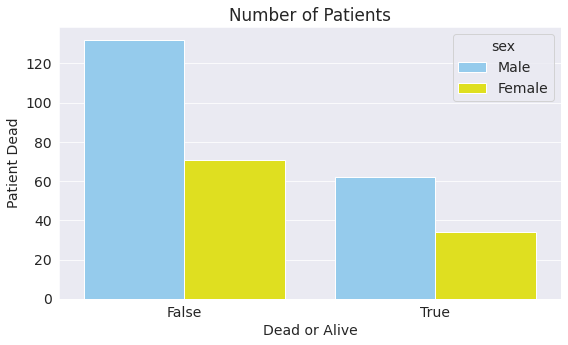

In [60]:
sns.countplot(x=heart_failure_df.patient_dead,hue=heart_failure_df.sex,palette=['lightskyblue','yellow'])
plt.xlabel("Dead or Alive")
plt.ylabel('Patient Dead')
plt.title("Number of Patients")

  <p style='text-align:justify;'> We can conclude from the above output, though we have more number of male patients, the proportion of male and female patients died during the follow-up period is almost equal. </p>

### Diseases 

  <p style='text-align:justify;'> We have to analyze the number of patients having anaemia, diabetes, high blood pressure, smoking habit, abnormal ejection fraction, abnormal creatinine and sodium level.</p>
  <p style='text-align:justify;'> 
So, let's create another column in our data frame to indicate the abnormalities of the various records.</p>
  <p style='text-align:justify;'> 
Let's use 'subplot' function from 'matplotlib.pyplot' to display 8 plots in a single output. </p>

In [62]:
#create columns to idnicate abnormalities
heart_failure_df['abnormal_ef']=np.where(((heart_failure_df.ejection_fraction >= 55) & (heart_failure_df.ejection_fraction <=70)) , 'Normal', 'Abormal')
heart_failure_df['abnormal_platelets']=np.where(((heart_failure_df.platelets >= 150) & (heart_failure_df.platelets <=400)) , 'Normal', 'Abormal')
heart_failure_df['abnormal_creatinine']=np.where(((heart_failure_df.serum_creatinine >= 0.6) & (heart_failure_df.serum_creatinine <=1.2)) , 'Normal', 'Abormal')
heart_failure_df['abnormal_sodium']=np.where(((heart_failure_df.serum_sodium >= 135) & (heart_failure_df.serum_sodium <=145)) , 'Normal', 'Abormal')


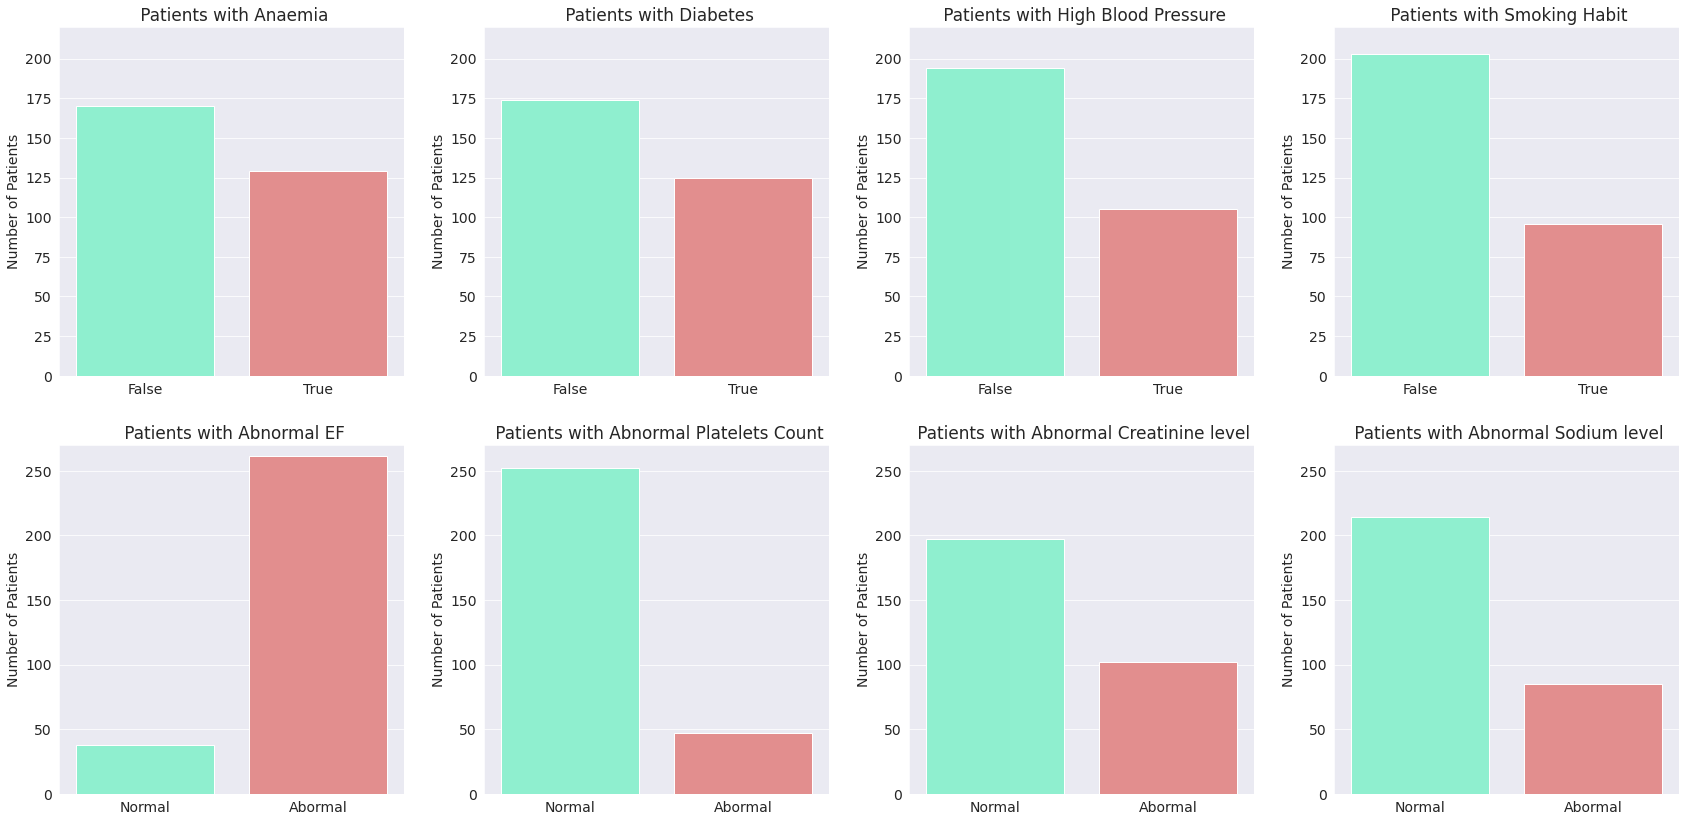

In [63]:
fig, axis = plt.subplots(2,4, figsize =(24, 12)) 
#axis(0,0) use this axis for Anaemia 
axis[0,0].set_title(" Patients with Anaemia")
sns.countplot(x = heart_failure_df.anaemia, ax=axis[0,0], palette=['aquamarine', 'lightcoral'] )
axis[0,0].set_xlabel("")
axis[0,0].set_ylabel("Number of Patients")
axis[0,0].set_ylim([0, 220])

#axis(0,1) use this axis for Diabetes 
axis[0,1].set_title(" Patients with Diabetes")
sns.countplot(x = heart_failure_df.diabetes, ax=axis[0,1], palette=['aquamarine', 'lightcoral'])
axis[0,1].set_xlabel("")
axis[0,1].set_ylabel("Number of Patients")
axis[0,1].set_ylim([0, 220])


#axis(0,2) use this axis for High blood pressure 
axis[0,2].set_title(" Patients with High Blood Pressure")
sns.countplot(x = heart_failure_df.high_blood_pressure, ax=axis[0,2], palette=['aquamarine', 'lightcoral'])
axis[0,2].set_xlabel("")
axis[0,2].set_ylabel("Number of Patients")
axis[0,2].set_ylim([0, 220])

#axis(0,3) use this axis for smoking habit 
axis[0,3].set_title(" Patients with Smoking Habit")
sns.countplot(x = heart_failure_df.smoking, ax=axis[0,3], palette=['aquamarine', 'lightcoral'])
axis[0,3].set_xlabel("")
axis[0,3].set_ylabel("Number of Patients")
axis[0,3].set_ylim([0, 220])


#axis(1,0) use this axis for Ejection Fraction 
axis[1,0].set_title(" Patients with Abnormal EF")
sns.countplot(x = heart_failure_df.abnormal_ef.sort_values(ascending =False) , ax=axis[1,0], palette=['aquamarine', 'lightcoral'])
axis[1,0].set_xlabel("")
axis[1,0].set_ylabel("Number of Patients")
axis[1,0].set_ylim([0, 270])

#axis(1,1) use this axis for Platelets count 
axis[1,1].set_title(" Patients with Abnormal Platelets Count")
sns.countplot(x = heart_failure_df.abnormal_platelets.sort_values(ascending =False) , ax=axis[1,1], palette=['aquamarine', 'lightcoral'])
axis[1,1].set_xlabel("")
axis[1,1].set_ylabel("Number of Patients")
axis[1,1].set_ylim([0, 270])

#axis(1,2) use this axis for Creatinine level 
axis[1,2].set_title(" Patients with Abnormal Creatinine level")
sns.countplot(x = heart_failure_df.abnormal_creatinine.sort_values(ascending =False), ax=axis[1,2], palette=['aquamarine', 'lightcoral'])
axis[1,2].set_xlabel("")
axis[1,2].set_ylabel("Number of Patients")
axis[1,2].set_ylim([0, 270])

#axis(1,3) use this axis for sodium level
axis[1,3].set_title(" Patients with Abnormal Sodium level")
sns.countplot(x = heart_failure_df.abnormal_sodium.sort_values(ascending =False), ax=axis[1,3], palette=['aquamarine', 'lightcoral'])
axis[1,3].set_xlabel("")
axis[1,3].set_ylabel("Number of Patients")
axis[1,3].set_ylim([0, 270])

#to provide spacing between adjacent plots
plt.tight_layout(pad=2);

  <p style='text-align:justify;'> As we can clearly identify, that abnormality in Ejection Fraction(EF) is the most common factor among the heart failure patients.</p>

  <p style='text-align:justify;'><b>"EF refers to the amount of blood being pumped out of the left ventricle each time it contracts. The left ventricle is the heart's main pumping chamber. Heart failure (HF) occurs when the heart cannot pump enough blood to meet the needs of the body".</b></p>
  <p style='text-align:justify;'> 
Low EF is one of the primary reasons which causes heart failure, that's the reason we have more number of patients with abnormal Ejection Fraction.</p>
  <p style='text-align:justify;'> 
Abnormal Ejection Fraction is followed by the abnormal creatinine and sodium level respectively, the factor which is least common among the heart failure patients is abnormal Platelets Count (i.e only 47 Patients). </p>
  <p style='text-align:justify;'> 
Number of Patients with Anaemia, Diabetes and High Blood Pressure are almost equal and ranges from 100 -  120 Patients. </p>





#### Pair wise relationship
  <p style='text-align:justify;'> 
A pair plot gives pairwise relationships in a dataset. Let’s say that we have 5 variables in a dataset. When we implement pair plot with this data, it will create plots between those 5 variables. Say for example, the first variable will be taken as the x-axis value and other variables will be taken as y-axis value individually. As a result, you will have 5 plots for 1st variable alone. This will be repeated for the other variables as well.</p>
  <p style='text-align:justify;'> 
The idea behind pair plot is to understand the relationship between the variables present in the data.</p>
  <p style='text-align:justify;'> 
Let's separate numeric columns from the dataset to apply 'pairplot' function to understand the relationship between the different attributes. </p>

In [64]:
numeric_column =heart_failure_df[['age','ejection_fraction','platelets','serum_creatinine','serum_sodium']]

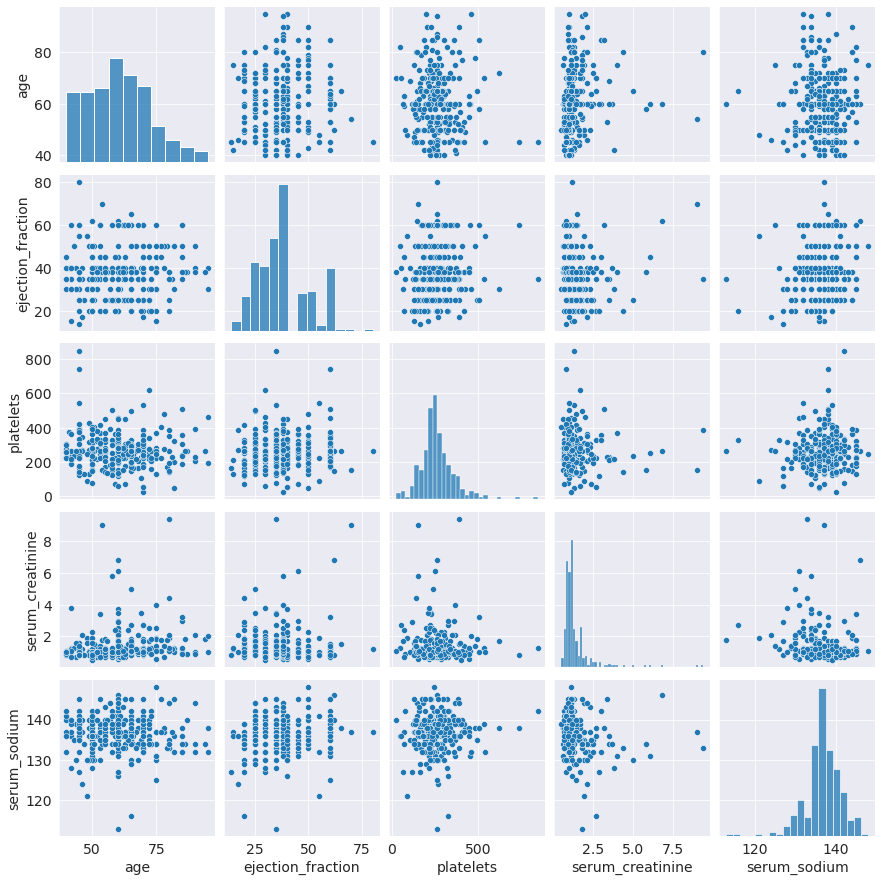

In [65]:
sns.pairplot(numeric_column)

  <p style='text-align:justify;'> By using 'pairplot' function, we can easily understand and visualize the relationship between the different variables. For example, from the above output we found that only a few patients has normal creatinine and sodium level. </p>

### Attributes - Distribution 

  <p style='text-align:justify;'> Let's build distribution plot for all  columns with numeric values.</p>

  <p style='text-align:justify;'><b> Distribution plot helps us to find whether the variables are normally distributed or skewed. </b></p>

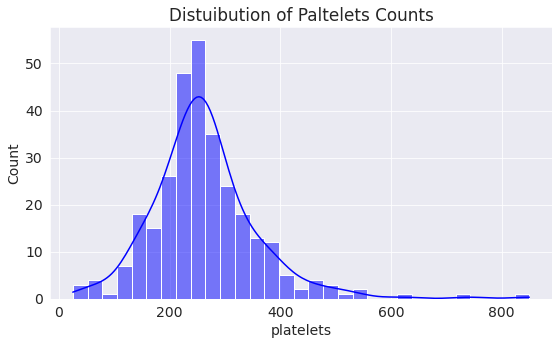

In [66]:
plt.title("Distuibution of Paltelets Counts")
sns.histplot(heart_failure_df.platelets,kde=True ,color='blue')
plt.show()

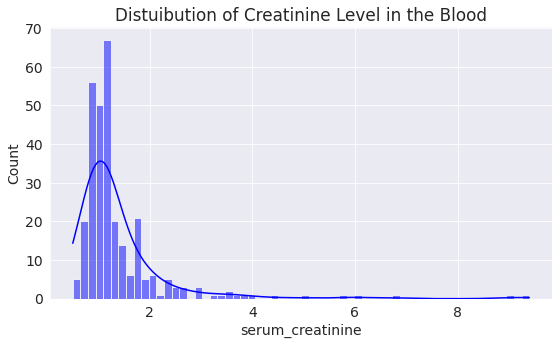

In [67]:
plt.title("Distuibution of Creatinine Level in the Blood")
sns.histplot(heart_failure_df.serum_creatinine,kde=True ,color='blue')
plt.show()

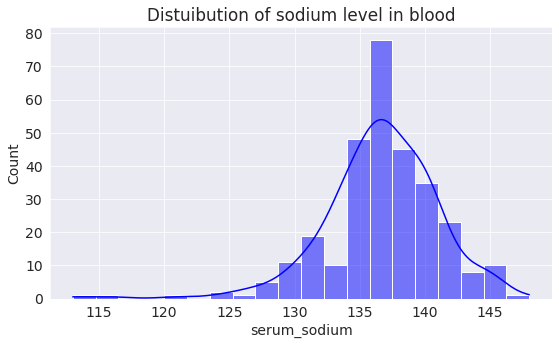

In [69]:
plt.title("Distuibution of sodium level in blood")
sns.histplot(heart_failure_df.serum_sodium,kde=True ,color='blue')
plt.show()

  <p style='text-align:justify;'> Now that we have plotted distribution plot for platelets count, creatinine level, sodium level and ejection fraction and it's obvious that no values are normally distributed. Platelets count, Ejection Fraction and Creatinine Level are right skewed and Sodium Level is left skewed. If the skewness in the data is more, we may have to perform some modifications, in order to get better results from the Machine Learning models once we train them.</p>

## Asking and Answering Questions

<p style='text-align:justify;'> We've already gained several insights about the heart failure patients and their clinical records by exploring individual columns of the dataset. Let's ask some specific questions and we'll try to answer them using data frame operations and visualization. </p>



#### Q1: How many number of patients are there in our observation? Out of them how many are male and female patients are there?

In [73]:
heart_failure_df.shape

(299, 15)

In [74]:
print("The total number of patients in our observation is {}.".format(heart_failure_df.shape[0]))

The total number of patients in our observation is 299.


In [75]:
heart_failure_df.sex.value_counts()

Male      194
Female    105
Name: sex, dtype: int64

In [77]:
print("Number of Male patients in our observation is {}.".format(heart_failure_df.sex.value_counts()[0]))
print("Number of Female patients in our observation is {}.".format(heart_failure_df.sex.value_counts()[1]))

Number of Male patients in our observation is 194.
Number of Female patients in our observation is 105.


#### Q2: How many patients had smoking habit ? out of them how many male and female patients are there ?

In [86]:
heart_failure_df[heart_failure_df.smoking == True].shape

(96, 15)

In [87]:
print("The number of Patients with smking Habit is {} .".format(heart_failure_df[heart_failure_df.smoking == True].shape[0]))

The number of Patients with smking Habit is 96 .


In [89]:
smokers= heart_failure_df[heart_failure_df.smoking ==True].groupby('sex').count()
smokers=smokers['smoking']
smokers

sex
Female     4
Male      92
Name: smoking, dtype: int64

In [90]:
print("The number of Male Patients with Smoking Habits is {}".format(smokers[1]))

The number of Male Patients with Smoking Habits is 92


In [92]:
print("The number of Female Patients with Smoking Habits is {}".format(smokers[0]))

The number of Female Patients with Smoking Habits is 4


#### Q3: How many patients had high anaemia or diabetes or high blood pressure ?

In [93]:
anaemia_patients = heart_failure_df[heart_failure_df.anaemia == True].shape[0]
diabetes_patients = heart_failure_df[heart_failure_df.diabetes == True].shape[0]
high_bp_patients = heart_failure_df[heart_failure_df.high_blood_pressure == True].shape[0]

In [94]:
print("Number of Patients with Anaemia is {}.".format(anaemia_patients))
print("Number of Patients with Diabetes is {}.".format(diabetes_patients))
print("Number of Patients with High Blood Pressure is {}.".format(high_bp_patients))

Number of Patients with Anaemia is 129.
Number of Patients with Diabetes is 125.
Number of Patients with High Blood Pressure is 105.


#### Q4: How many patients had both (anemia & diabetes) or (anaemia & high blood pressure) or (diabetes & high blood pressure) ? And how many patients had all three ?

In [95]:
anaemia_diabetes = heart_failure_df[(heart_failure_df.anaemia == True) & (heart_failure_df.diabetes == True)].shape[0]
anaemia_high_bp = heart_failure_df[(heart_failure_df.anaemia == True) & (heart_failure_df.high_blood_pressure == True)].shape[0]
diabetes_high_bp = heart_failure_df[(heart_failure_df.high_blood_pressure == True) & (heart_failure_df.diabetes == True)].shape[0]   

In [96]:
print("Number of Patients with Anaemia and Diabetes is {}.".format(anaemia_diabetes))
print("Number of Patients with Anaemia and High Blood Pressure is {}.".format(anaemia_high_bp))
print("Number of Patients with Diabetes and High Blood Pressure is {}.".format(diabetes_high_bp))

Number of Patients with Anaemia and Diabetes is 53.
Number of Patients with Anaemia and High Blood Pressure is 48.
Number of Patients with Diabetes and High Blood Pressure is 43.


In [97]:
all_three = heart_failure_df[(heart_failure_df.anaemia == True) & (heart_failure_df.diabetes == True) & (heart_failure_df.high_blood_pressure == True)].shape[0]
all_three

17

In [98]:
print("Number of Patients with Anaemia, Diabetes and High Blood Pressure is {}.".format(all_three))


Number of Patients with Anaemia, Diabetes and High Blood Pressure is 17.


#### Q5: How many patients died during the follow-up period ? out of them how many male and female patients are there ?

In [99]:
heart_failure_df[heart_failure_df.patient_dead == True].shape[0]

96

In [100]:
print("Number of Patients died during follow-up period is {}.".format(heart_failure_df[heart_failure_df.patient_dead == True].shape[0]))


Number of Patients died during follow-up period is 96.


## Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:
<ul style='text-align:justify;'><li>
Based on the recorded patients gender, we can infer that the dataset is slightly imbalanced, since only 35.1% of Patients were Female.</li>
<li>We have more number of patients under 60-65 age group and the next place goes to 50-55 age group.  And the number of patients recorded starts declining from 65-70 age group,  it's obvious since the life expectancy of a person in Pakistan in 2015 was approximately 67 years.</li>

<li>32.1% of patients died during the follow-up period. This might be because the data mentioned in our data frame corresponds to only the certain period of time (April'15 - December'15) and more number of patients might have died after this period (which isn't recorded).</li>

<li>Maximum patients died (during the follow-up period is) under 60-65 age group (i.e 15 Patients). It's obvious, since we have more number of patients in 60-65 age group. And the proportion of patients died starts increasing from 65-70 age group and the number of patients died is more than alive patients in the age group of 80-85, 85-90 and 90-95. This is because over the time, the body’s immune system naturally becomes less capable of handling new threats, such as viruses including novel corona virus. This increases the risk of having issues with various illnesses which ultimately leads to their end.</li>

<li>The proportion of male and female patients died during the follow-up period is almost equal (i.e ~32%).</li>

<li>The abnormality in Ejection Fraction(EF) is the most common factor among the heart failure patients. Abnormal Ejection Fraction is followed by the abnormal creatinine and sodium level in the blood respectively, the factor which is least common among the heart failure patients is abnormal Platelets Count (i.e only 47 Patients).</li>

<li>No medical record values have been normally distributed. Platelets count, Ejection Fraction and Creatinine Level are right skewed and Sodium Level is left skewed.</li>

<li>The most common abnormality or disease among the heart failure patients is Ejection Fraction and 261 Patients had abnormal Ejection Fraction.</li>

<li>The least common abnormality or disease among the heart failure patients is Abnormal Platelets Count and 47 Patients had abnormal Platelets Count.</li>

<li>Though they had normal ejection fraction and normal creatinine level in the blood, some patients with smoking habit died. So, we can conclude that the smoking habit has little impact on the life expectancy of a heart failure patient.</li> </ul>


## References and Future Work
 

### References
  <p style='text-align:justify;'> 
Check out the following resources to learn more about the dataset, attributes and tools used in this notebook:</p>
 
- Heart Failure Clinical Records Dataset in Kaggle:
https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


- Pandas user guide: 
https://pandas.pydata.org/docs/user_guide/index.html

- Matplotlib user guide:
https://matplotlib.org/3.3.1/users/index.html

- Seaborn user guide & tutorial:
https://seaborn.pydata.org/tutorial.html

- `opendatasets` Python library: https://github.com/JovianML/opendatasets

- Data Visualization in Python:
https://medium.com/@siddhardhan23/data-visualization-in-python-a90ddb706b23


### Future Work

  <p style='text-align:justify;'> There are a lot of improvements we can make to our project in the future with the help of necessary tools and datasets. Here are some of the things we could do in enhancing our project:</p>

<ul style='text-align:justify;' ><li>Analyze what is the most common factor among heart failure patients to confirm our findings, using data gathered from all over the world on heart failure patients</li>

<li>Determine the number of patients who died based on their abnormality and disease. For example: Number of Patients who died with Anaemia and Diabetes, Number of Patients who died with Abnormal Ejection Fraction, High Blood Pressure, and Abnormal Creatinine Level.</li>

<li>Study further about the clinical records like 'Ejection Fraction' and 'Creatinine Level' and how they are interrelated.</li>

<li>Predict the life expectancy of heart failure patients through machine learning models.</li></ul>